In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [16]:
main_df = pd.read_csv('../data/World Energy Consumption.csv')
main_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [17]:
countries = ['New Zealand','Canada','United States','Australia','United Kingdom','Germany','France','Italy','Spain','Japan']
filtered_df = main_df[main_df['country'].isin(countries)]
filtered_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1512,Australia,1900,AUS,3693331.0,2.393118e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1513,Australia,1901,AUS,3755013.0,2.322160e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514,Australia,1902,AUS,3815541.0,2.346190e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515,Australia,1903,AUS,3874858.0,2.531231e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,Australia,1904,AUS,3935097.0,2.701432e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20706,United States,2018,USA,332140032.0,1.814065e+13,-1.325,-5.433,1218.223,404.621,186.156,...,2.222,0.932,7.222,45.081,728.691,820.949,272.67,2193.926,6.490,2.723
20707,United States,2019,USA,334319680.0,NaN,2.780,11.250,1243.930,415.870,172.021,...,2.570,1.071,8.514,59.126,787.816,885.021,295.88,2356.476,7.115,2.965
20708,United States,2020,USA,335942016.0,NaN,-9.029,-37.549,1126.150,378.321,162.826,...,3.233,1.409,14.214,108.672,896.488,1005.947,337.94,2668.579,8.358,3.644
20709,United States,2021,USA,336997632.0,NaN,9.917,37.518,1233.954,415.839,160.980,...,3.958,1.675,11.913,103.127,999.615,1122.263,378.20,2966.237,9.105,3.853


In [18]:
columns_needed = ['country', 'year', 'electricity_generation', 'electricity_demand']
data_selected = filtered_df[columns_needed]

# Check for missing values in the selected columns
data_selected.isnull().sum()

country                     0
year                        0
electricity_generation    850
electricity_demand        950
dtype: int64

In [19]:
data_selected = data_selected.dropna()
data_selected.isnull().sum()

country                   0
year                      0
electricity_generation    0
electricity_demand        0
dtype: int64

In [ ]:
def demand_vs_generation_efficiency(countries):
    plt.figure(figsize=(12,6))
    for country in countries:
        subset = data_selected[data_selected['country'] == country]
        efficiency = subset['electricity_generation'] / subset['electricity_demand']
        plt.plot(subset['year'], efficiency, label=country)

    plt.title('Electricity Generation vs Demand Efficiency')
    plt.xlabel('Year')
    plt.ylabel('Efficiency Ratio')
    plt.legend()
    plt.grid(True)
    plt.show()

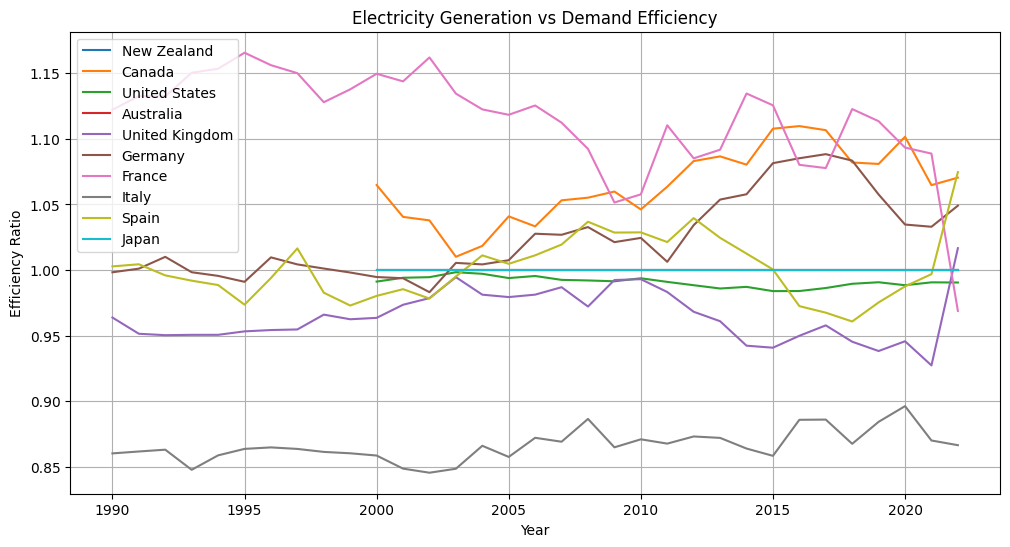

In [21]:
demand_vs_generation_efficiency(countries)